## [요구사항 1] titanic_dataset.py 분석 리포트 작성법

In [373]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, random_split

PyTorch를 이용하여 딥러닝 모델 학습을 위한 기본적인 환경을 설정하는 코드입니다. 주로 데이터 로딩, 전처리, 데이터셋 생성, 데이터 로더 생성, 데이터 분할 등의 작업을 수행하기 위한 라이브러리를 불러오는 역할을 합니다.

In [374]:
class TitanicTestDataset(Dataset):
  def __init__(self, X):
    self.X = torch.FloatTensor(X)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    feature = self.X[idx]
    return {'input': feature}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}".format(
      len(self.X), self.X.shape
    )
    return str

이 클래스는 PyTorch 모델에 타이타닉 테스트 데이터를 제공하기 위한 준비 작업을 수행합니다. PyTorch의 DataLoader와 함께 사용하여 미니 배치를 생성하고 모델 학습 및 평가에 활용할 수 있습니다.

In [375]:
class TitanicDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.FloatTensor(X)
    self.y = torch.LongTensor(y)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    feature = self.X[idx]
    target = self.y[idx]
    return {'input': feature, 'target': target}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.X), self.X.shape, self.y.shape
    )
    return str

이 클래스는 타이타닉 데이터셋을 PyTorch에서 사용할 수 있도록 정의한 클래스입니다. PyTorch 데이터셋으로 변환해줍니다

In [376]:
def get_preprocessed_dataset():
    CURRENT_FILE_PATH = os.path.dirname(os.path.abspath("__file__"))

    train_data_path = os.path.join(CURRENT_FILE_PATH, "train.csv")
    test_data_path = os.path.join(CURRENT_FILE_PATH, "test.csv")

    train_df = pd.read_csv(train_data_path)
    test_df = pd.read_csv(test_data_path)

    all_df = pd.concat([train_df, test_df], sort=False)

    all_df = get_preprocessed_dataset_1(all_df)

    all_df = get_preprocessed_dataset_2(all_df)

    all_df = get_preprocessed_dataset_3(all_df)

    all_df = get_preprocessed_dataset_4(all_df)

    all_df = get_preprocessed_dataset_5(all_df)

    all_df = get_preprocessed_dataset_6(all_df)

    train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
    train_y = train_df["Survived"]

    test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

    dataset = TitanicDataset(train_X.values, train_y.values)
    #print(dataset)
    train_dataset, validation_dataset = random_split(dataset, [0.8, 0.2])
    test_dataset = TitanicTestDataset(test_X.values)
    #print(test_dataset)

    return train_dataset, validation_dataset, test_dataset

이 함수는 타이타닉 데이터셋을 전처리하고, 학습, 검증, 테스트 데이터셋으로 분할하는 역할을 합니다. 모델 학습에 사용할 수 있는 전처리된 데이터셋을 준비합니다.

In [377]:
def get_preprocessed_dataset_1(all_df):
    # Pclass별 Fare 평균값을 사용하여 Fare 결측치 메우기
    Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
    Fare_mean.columns = ["Pclass", "Fare_mean"]
    all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
    all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]

    return all_df

이 함수는 타이타닉 데이터셋에서 Fare(요금)의 결측치를 처리하는 함수입니다. 이 함수는 Fare 데이터의 결측치를 Pclass를 기준으로 한 평균값으로 채워 넣어 데이터의 완전성을 높입니다.

In [378]:
def get_preprocessed_dataset_2(all_df):
    # name을 세 개의 컬럼으로 분리하여 다시 all_df에 합침
    name_df = all_df["Name"].str.split("[,.]", n=2, expand=True)
    name_df.columns = ["family_name", "honorific", "name"]
    name_df["family_name"] = name_df["family_name"].str.strip()
    name_df["honorific"] = name_df["honorific"].str.strip()
    name_df["name"] = name_df["name"].str.strip()
    all_df = pd.concat([all_df, name_df], axis=1)

    return all_df

이 함수는 타이타닉 데이터셋의 'Name' 열을 분리하여 새로운 특징을 생성하는 함수입니다. 'Name' 열에 포함된 정보를 더 세분화하여 모델 학습에 활용할 수 있도록 가공합니다.

In [379]:
def get_preprocessed_dataset_3(all_df):
    # honorific별 Age 평균값을 사용하여 Age 결측치 메우기
    honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").median().round().reset_index()
    honorific_age_mean.columns = ["honorific", "honorific_age_mean", ]
    all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
    all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_age_mean"]
    all_df = all_df.drop(["honorific_age_mean"], axis=1)

    return all_df

이 함수는 타이타닉 데이터셋에서 Age(나이)의 결측치를 처리하는 함수입니다. Age 데이터의 결측치를 호칭을 기준으로 한 중앙값으로 채워 넣어 데이터의 완전성을 높입니다.

In [380]:
def get_preprocessed_dataset_4(all_df):
    # 가족수(family_num) 컬럼 새롭게 추가
    all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]

    # 혼자탑승(alone) 컬럼 새롭게 추가
    all_df.loc[all_df["family_num"] == 0, "alone"] = 1
    all_df["alone"].fillna(0, inplace=True)

    # 학습에 불필요한 컬럼 제거
    all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis=1)

    return all_df

이 함수는 타이타닉 데이터셋에 새로운 특징을 추가하고 불필요한 열을 제거하는 함수입니다. 새로운 특징을 생성하고 불필요한 정보를 제거하여 모델 학습에 필요한 데이터를 정제합니다.

In [381]:
def get_preprocessed_dataset_5(all_df):
    # honorific 값 개수 줄이기
    all_df.loc[
    ~(
            (all_df["honorific"] == "Mr") |
            (all_df["honorific"] == "Miss") |
            (all_df["honorific"] == "Mrs") |
            (all_df["honorific"] == "Master")
    ),
    "honorific"
    ] = "other"
    all_df["Embarked"].fillna("missing", inplace=True)

    return all_df

이 함수는 타이타닉 데이터셋의 'honorific' (호칭)과 'Embarked' (승선 항구) 열에 대한 전처리를 수행합니다. 모델 학습에 불필요한 세부 정보를 줄이고, 결측치를 처리하여 데이터를 단순화합니다.

In [382]:
def get_preprocessed_dataset_6(all_df):
    # 카테고리 변수를 LabelEncoder를 사용하여 수치값으로 변경하기
    category_features = all_df.columns[all_df.dtypes == "object"]
    from sklearn.preprocessing import LabelEncoder
    for category_feature in category_features:
        le = LabelEncoder()
        if all_df[category_feature].dtypes == "object":
          le = le.fit(all_df[category_feature])
          all_df[category_feature] = le.transform(all_df[category_feature])

    return all_df

이 함수는 타이타닉 데이터셋에서 범주형 변수를 수치형 변수로 변환하는 함수입니다. 머신러닝 모델이 범주형 데이터를 다룰 수 있도록 숫자로 변환하는 작업을 수행합니다.

In [383]:
from torch import nn
class MyModel(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(n_input, 30),
      nn.ReLU(),
      nn.Linear(30, 30),
      nn.ReLU(),
      nn.Linear(30, n_output),
    )

  def forward(self, x):
    x = self.model(x)
    return x

이 코드는 PyTorch를 이용하여 간단한 다층 퍼셉트론(Multi-Layer Perceptron, MLP) 모델을 정의하는 클래스입니다. 다양한 종류의 예측 문제에 사용될 수 있는 기본적인 신경망 모델의 틀을 제공합니다.

In [384]:
def test(test_data_loader):
  print("[TEST]")
  batch = next(iter(test_data_loader))
  print("{0}".format(batch['input'].shape))
  my_model = MyModel(n_input=11, n_output=2)
  output_batch = my_model(batch['input'])
  prediction_batch = torch.argmax(output_batch, dim=1)
  for idx, prediction in enumerate(prediction_batch, start=892):
      print(idx, prediction.item())

이 함수는 테스트 데이터 로더를 사용하여 모델의 예측 결과를 출력하는 함수입니다. 모델의 성능을 평가하기 위해 테스트 데이터에 대한 예측 결과를 확인하는 역할을 합니다.

In [385]:
if __name__ == "__main__":
  train_dataset, validation_dataset, test_dataset = get_preprocessed_dataset()

  print("train_dataset: {0}, validation_dataset.shape: {1}, test_dataset: {2}".format(
    len(train_dataset), len(validation_dataset), len(test_dataset)
  ))
  print("#" * 50, 1)

  for idx, sample in enumerate(train_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'], sample['target']))

  print("#" * 50, 2)

  train_data_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
  validation_data_loader = DataLoader(dataset=validation_dataset, batch_size=16, shuffle=True)
  test_data_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset))

  print("[TRAIN]")
  for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

  print("[VALIDATION]")
  for idx, batch in enumerate(validation_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

  print("#" * 50, 3)

  test(test_data_loader)

train_dataset: 713, validation_dataset.shape: 178, test_dataset: 418
################################################## 1
0 - tensor([ 3.0000,  0.0000, 16.0000,  0.0000,  0.0000,  7.7333,  1.0000, 13.3029,
         1.0000,  0.0000,  1.0000]): 1
1 - tensor([ 1.0000,  1.0000, 34.0000,  0.0000,  0.0000, 26.5500,  2.0000, 87.5090,
         2.0000,  0.0000,  1.0000]): 1
2 - tensor([ 3.0000,  1.0000, 26.0000,  0.0000,  0.0000, 56.4958,  2.0000, 13.3029,
         2.0000,  0.0000,  1.0000]): 1
3 - tensor([ 1.0000,  0.0000, 35.0000,  1.0000,  0.0000, 90.0000,  2.0000, 87.5090,
         3.0000,  1.0000,  0.0000]): 1
4 - tensor([ 1.0000,  1.0000, 29.0000,  0.0000,  0.0000, 42.4000,  2.0000, 87.5090,
         2.0000,  0.0000,  1.0000]): 0
5 - tensor([ 2.0000,  0.0000, 28.0000,  1.0000,  0.0000, 24.0000,  0.0000, 21.1792,
         3.0000,  1.0000,  0.0000]): 1
6 - tensor([ 3.0000,  1.0000, 29.0000,  0.0000,  0.0000,  8.0500,  2.0000, 13.3029,
         2.0000,  0.0000,  1.0000]): 0
7 - tensor([ 2.00

372 - tensor([ 3.0000,  1.0000, 29.0000,  0.0000,  0.0000,  8.0500,  2.0000, 13.3029,
         2.0000,  0.0000,  1.0000]): 0
373 - tensor([ 3.0000,  0.0000, 18.0000,  0.0000,  0.0000,  6.7500,  1.0000, 13.3029,
         1.0000,  0.0000,  1.0000]): 0
374 - tensor([ 2.0000,  0.0000, 36.0000,  0.0000,  0.0000, 13.0000,  2.0000, 21.1792,
         3.0000,  0.0000,  1.0000]): 1
375 - tensor([ 3.0000,  1.0000, 29.0000,  0.0000,  0.0000,  7.2500,  2.0000, 13.3029,
         2.0000,  0.0000,  1.0000]): 0
376 - tensor([ 2.0000,  1.0000, 34.0000,  1.0000,  0.0000, 26.0000,  2.0000, 21.1792,
         2.0000,  1.0000,  0.0000]): 0
377 - tensor([ 2.0000,  1.0000, 57.0000,  0.0000,  0.0000, 12.3500,  1.0000, 21.1792,
         4.0000,  0.0000,  1.0000]): 0
378 - tensor([ 2.0000,  1.0000, 47.0000,  0.0000,  0.0000, 15.0000,  2.0000, 21.1792,
         2.0000,  0.0000,  1.0000]): 0
379 - tensor([ 3.0000,  0.0000, 11.0000,  4.0000,  2.0000, 31.2750,  2.0000, 13.3029,
         1.0000,  6.0000,  0.0000]): 0


이 코드는 전체 프로그램의 실행 엔트리 포인트로, 데이터셋 준비, 모델 학습, 검증, 테스트를 진행합니다. 전체 프로그램의 흐름을 제어하고, 각 단계에서 필요한 작업을 수행합니다.

## [요구사항 2] titanic 딥러닝 모델 훈련 코드 및 Activation	Function 변경해보기

In [386]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from datetime import datetime
import wandb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Config 설정
config = {
    'epochs': 1000,
    'batch_size': 64,
    'learning_rate': 1e-3,
    'n_hidden_unit_list': [32, 16],
    'wandb_mode': "online"  # WandB 모드 ("online" or "disabled")
}

# WandB 초기화
wandb.init(
    mode=config['wandb_mode'],
    project="titanic_survival_prediction",
    notes="Titanic Survival Prediction with PyTorch and WandB",
    tags=["titanic", "survival", "binary_classification"],
    name=datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S'),
    config=config
)

# 데이터 로드 및 전처리
def load_data():
    # Titanic 데이터 로드 (캐글 데이터셋 기준)
    df = pd.read_csv("train.csv")
    
    # 필요한 열 선택 및 결측치 처리
    df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # 범주형 변수를 숫자로 변환
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # 특성과 레이블 분리
    X = df.drop(columns='Survived').values
    y = df['Survived'].values
    
    # 스케일링
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # 학습 및 검증 데이터 분할
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # PyTorch Tensor로 변환
    X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
    X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32)
    
    # DataLoader 생성
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    
    train_loader = DataLoader(train_dataset, batch_size=wandb.config.batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))
    
    return train_loader, val_loader

# 모델 정의
class MyModel(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_input, wandb.config.n_hidden_unit_list[0]),
            nn.ReLU(),
            nn.Linear(wandb.config.n_hidden_unit_list[0], wandb.config.n_hidden_unit_list[1]),
            nn.ReLU(),
            nn.Linear(wandb.config.n_hidden_unit_list[1], n_output),
            nn.Sigmoid()  # 이진 분류를 위한 Sigmoid 함수
        )

    def forward(self, x):
        return self.model(x)

def get_model_and_optimizer():
    model = MyModel(n_input=7, n_output=1)  # n_input: 특성 수, n_output: 이진 분류
    optimizer = optim.Adam(model.parameters(), lr=wandb.config.learning_rate)
    return model, optimizer

# 학습 루프
def training_loop(model, optimizer, train_loader, val_loader):
    n_epochs = wandb.config.epochs
    loss_fn = nn.BCELoss()  # 이진 크로스 엔트로피 손실 함수
    next_print_epoch = 100

    for epoch in range(1, n_epochs + 1):
        model.train()
        loss_train = 0.0
        for inputs, targets in train_loader:
            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, targets)
            loss_train += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # 검증 손실 계산
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            val_preds, val_targets = [], []
            for inputs, targets in val_loader:
                outputs = model(inputs).squeeze()
                loss = loss_fn(outputs, targets)
                val_loss += loss.item()
                
                # 정확도 계산을 위한 예측값 저장
                val_preds.extend(outputs.round().cpu().numpy())
                val_targets.extend(targets.cpu().numpy())
                
            val_accuracy = accuracy_score(val_targets, val_preds)

        # WandB 로그 기록
        wandb.log({
            "Epoch": epoch,
            "Training loss": loss_train / len(train_loader),
            "Validation loss": val_loss / len(val_loader),
            "Validation accuracy": val_accuracy
        })

        if epoch >= next_print_epoch:
            print(
                f"Epoch {epoch}, "
                f"Training loss {loss_train / len(train_loader):.4f}, "
                f"Validation loss {val_loss / len(val_loader):.4f}, "
                f"Validation accuracy {val_accuracy:.4f}"
            )
            next_print_epoch += 100

# 실행
train_loader, val_loader = load_data()
model, optimizer = get_model_and_optimizer()

training_loop(
    model=model,
    optimizer=optimizer,
    train_loader=train_loader,
    val_loader=val_loader
)

wandb.finish()

Epoch 100, Training loss 0.3729, Validation loss 0.4280, Validation accuracy 0.8212
Epoch 200, Training loss 0.3568, Validation loss 0.4382, Validation accuracy 0.8045
Epoch 300, Training loss 0.3374, Validation loss 0.4526, Validation accuracy 0.7989
Epoch 400, Training loss 0.3073, Validation loss 0.4733, Validation accuracy 0.8156
Epoch 500, Training loss 0.2985, Validation loss 0.4904, Validation accuracy 0.8101
Epoch 600, Training loss 0.2882, Validation loss 0.5154, Validation accuracy 0.8101
Epoch 700, Training loss 0.2806, Validation loss 0.5437, Validation accuracy 0.8101
Epoch 800, Training loss 0.2885, Validation loss 0.5648, Validation accuracy 0.8101
Epoch 900, Training loss 0.2937, Validation loss 0.5856, Validation accuracy 0.8101
Epoch 1000, Training loss 0.2704, Validation loss 0.6262, Validation accuracy 0.8045


Epoch,▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▇███████
Training loss,█▇▆▇▆▆█▅▄█▄▆▆▆▅▄▄▄▄▄▃▃▃▃▄▂▂▃▁▂▂▃▂▁▁▃▁▂▂▂
Validation accuracy,▄▇▇▇▇▇█▄▂▃▃▂▃▄▆▄▄▆▄▃▄▄▄▄▇▆▄▁▄▄▄▇▃▂▄▃█▂▃▃
Validation loss,▇▅▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇██
Epoch,1000
Training loss,0.27036
Validation accuracy,0.80447
Validation loss,0.62622


https://wandb.ai/mini2624-korea-university-of-technology-and-education/titanic_survival_prediction

기본적으로는 ReLU가 효율적이지만, Leaky ReLU나 PReLU가 더 나은 성능을 낼 수 있음.
ELU는 복잡한 패턴에서 개선된 성능 가능.

## [요구사항 3] 테스트 및 submission.csv 생성

먼저 최적의 활성화 함수로 PReLU를 선택하여 모델을 구성한 뒤, 모델 훈련 중 가장 낮은 Validation Loss를 기록한 Epoch 시점에서 테스트 데이터를 사용하여 예측을 수행함.

In [387]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from datetime import datetime
import wandb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Config 설정
config = {
    'epochs': 1000,
    'batch_size': 64,
    'learning_rate': 1e-3,
    'n_hidden_unit_list': [32, 16],
    'wandb_mode': "disabled",  # 노트북 환경에서는 WandB 비활성화
}

# WandB 초기화
wandb.init(
    mode=config['wandb_mode'],
    project="titanic_survival_prediction",
    notes="Titanic Survival Prediction with PReLU",
    tags=["titanic", "survival", "PReLU"],
    name=datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S'),
    config=config
)

# 데이터 로드 및 전처리
def load_data():
    df = pd.read_csv("train.csv")
    test_df = pd.read_csv("test.csv")
    
    def preprocess(df):
        df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
        df['Age'].fillna(df['Age'].median(), inplace=True)
        df['Fare'].fillna(df['Fare'].median(), inplace=True)
        df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
        df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
        df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
        return df
    
    X = preprocess(df)
    y = df['Survived'].values
    X_test = preprocess(test_df)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_test = scaler.transform(X_test)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
    X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))
    test_loader = DataLoader(TensorDataset(X_test), batch_size=len(X_test))
    
    return train_loader, val_loader, test_loader

class MyModel(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_input, config['n_hidden_unit_list'][0]),
            nn.PReLU(),
            nn.Linear(config['n_hidden_unit_list'][0], config['n_hidden_unit_list'][1]),
            nn.PReLU(),
            nn.Linear(config['n_hidden_unit_list'][1], n_output),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

def get_model_and_optimizer():
    model = MyModel(n_input=7, n_output=1)
    optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])
    return model, optimizer

def training_loop(model, optimizer, train_loader, val_loader, test_loader):
    loss_fn = nn.BCELoss()
    best_val_loss = float('inf')
    best_epoch, best_preds = 0, None

    for epoch in range(1, config['epochs'] + 1):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, targets)
            train_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            val_preds, val_targets = [], []
            for inputs, targets in val_loader:
                outputs = model(inputs).squeeze()
                val_loss += loss_fn(outputs, targets).item()
                val_preds.extend(outputs.round().cpu().numpy())
                val_targets.extend(targets.cpu().numpy())

        val_accuracy = accuracy_score(val_targets, val_preds)
        avg_val_loss = val_loss / len(val_loader)
        wandb.log({
            "Epoch": epoch,
            "Training Loss": train_loss / len(train_loader),
            "Validation Loss": avg_val_loss,
            "Validation Accuracy": val_accuracy
        })

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_epoch = epoch
            with torch.no_grad():
                best_preds = model(next(iter(test_loader))[0]).squeeze().round().cpu().numpy()

    print(f"Best model at Epoch {best_epoch} with Validation Loss: {best_val_loss:.4f}")

    submission = pd.DataFrame({
        "PassengerId": pd.read_csv("test.csv")["PassengerId"],
        "Survived": best_preds.astype(int)
    })
    submission.to_csv("submission.csv", index=False)

# 데이터 로드 및 모델 학습
train_loader, val_loader, test_loader = load_data()
model, optimizer = get_model_and_optimizer()
training_loop(model, optimizer, train_loader, val_loader, test_loader)

wandb.finish()

/tmp/ipykernel_125/1109602422.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_125/1109602422.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'].fillna(df['Fare'].median(), inplace=True)
/tmp/ipykernel_125/1109602422.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipykernel_125/11096

Best model at Epoch 31 with Validation Loss: 0.4038


조기 예측 및 최적 모델 선택: Validation Loss가 가장 낮은 Epoch의 테스트 예측을 최종 submission.csv에 저장한다

## [요구사항 4] submission.csv 제출 및 등수확인

![record.png](https://github.com/Moon-hyunsu/moonhs/blob/main/record.png)

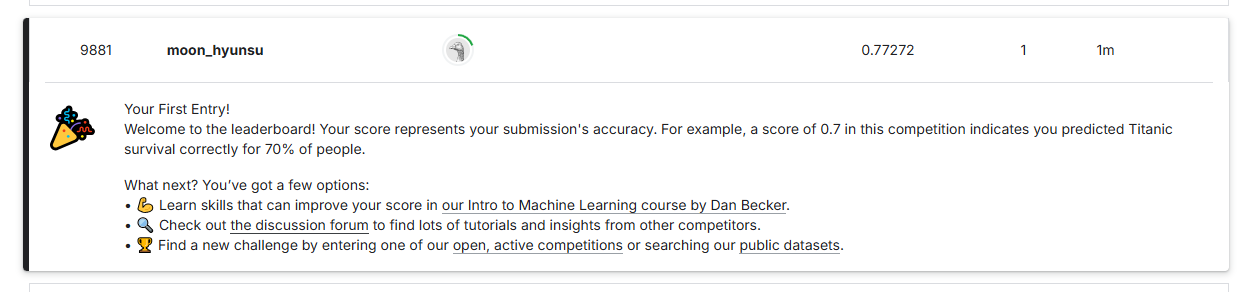

## 숙제후기

해당 과제를 수행하면서 직접 캐글 플랫폼을 처음으로 알았지만 직접 다른 참가자들과 경쟁하는 기분이 들어서 색달랐고 뿐만 아니라 최근에 학교 행사로 잡행사에 참가하면서 인공지능에 대해 여러 정보를 탐색하는 과정 속에서 해당 과제를 수행하는 능력이 앞으로 얼마나 중요한지 깨닫고 AI 및 머신러닝 분야에서 지속적으로 학습하고 개선해야 할 부분이 많다는 사실을 다시금 느꼈습니다. 